In [ ]:
 !nvidia-smi

Mon Mar 14 19:29:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!cp -a ./drive/MyDrive/inpainting_fianl_project/code/. .

In [ ]:
!unzip test.zip -d .

In [ ]:
import torch
dtype = torch.float32
if torch.cuda.is_available():
    device = torch.device('cuda:0')
    torch.cuda.empty_cache()
else:
    device = torch.device('cpu')

print('using device:', device)

using device: cuda:0


In [ ]:
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt

from options import Options as opt
from inpainting_model import InpaintingModel
from utils import show_images

In [ ]:
def load_data(img_path, mask_path, input_size: int = 256):
    img_transform = T.Compose([
        T.Resize(input_size),
        T.CenterCrop(input_size),
        T.ToTensor(),
        T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    mask_transform = T.Compose([
        T.Resize(input_size),
        T.CenterCrop(input_size),
        T.ToTensor(),
    ])

    img = Image.open(img_path)
    mask = Image.open(mask_path)
    return img_transform(img).unsqueeze(0), ~(mask_transform(mask)[1, :, :].unsqueeze(0).unsqueeze(0).to(torch.bool))



@torch.no_grad()
def test(img, mask, model: InpaintingModel):
    model.set_input(img, mask)
    model.forward()

    generated_img = model.generated_images.data.cpu()  # .numpy()
    # show_images(generated_images, images * masks, 4)
    show_images(img, generated_img, mask)
    plt.show()


def run_model(device: torch.device = torch.device('cpu'), dtype: torch.dtype = torch.float32):
    img, mask = load_data(img_path=img_path, mask_path=mask_path, input_size=opt.input_size)
    model = InpaintingModel(is_train=False, device=device, dtype=dtype)
    model.net_G.load_state_dict(torch.load(model_path, map_location=device))

    model.eval()
    test(img, mask, model)

In [ ]:
img_path = 'test/photos_blocks/1.jpeg_result_multiple_.jpg'
mask_path = 'test/photos_blocks/1.jpeg_mask_multiple_.jpg'
model_path = 'best_g_model_photos.pth'
model_path = 'best_g_model_monet.pth'

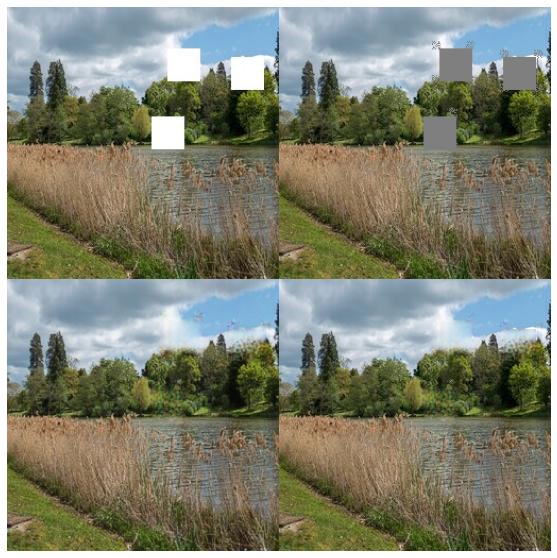

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

run_model(device=device, dtype=dtype)